# Telecom Churn case study using PCA and Ensemble

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Goal
It is your job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability"
Note: Make sure your accuracy is greater than the sample submission that is present in the leaderboard

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## Step 1. Reading, Understanding and Visualizing the data

In [2]:
telecom_train_df = pd.read_csv('train (1).csv')
telecom_test_df = pd.read_csv('test (1).csv')

In [3]:
telecom_train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
telecom_test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [5]:
telecom_train_df.shape

(69999, 172)

In [6]:
telecom_test_df.shape

(30000, 171)

In [7]:
telecom_train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [8]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [9]:
telecom_train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [10]:
telecom_train_df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [11]:
telecom_train_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [12]:
# Columns which we have to impute as Zero as thy should not be dropped based on missing values becuase they are important.
rech_cols_to_impute = [x for x in telecom_train_df.columns if 'rech' in x and 
                       'count' not in x and 'date' not in x and 'num' not in x]
telecom_train_df[rech_cols_to_impute] = telecom_train_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))
telecom_test_df[rech_cols_to_impute] = telecom_test_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))


### Dropping rows for both train and test datasets
 - Rows which are empty

In [13]:
telecom_train_df.dropna(axis=0, how='all', inplace=True)
telecom_test_df.dropna(axis=0, how='all', inplace=True)

In [14]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 172)
(30000, 171)


### Dropping columns for both train and test datasets

    - Not needed columns like Id, last_date_of_month_6 etc.
    - Columns having more than 70% values as null

In [15]:
# For us dates doesn't matter as long as customer is doing a recharge.
cols_to_delete = ['id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                  'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                  'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'
                 ]
telecom_train_df.drop(cols_to_delete, axis=1, inplace=True)
telecom_test_df.drop(cols_to_delete, axis=1, inplace=True)

In [16]:
# to check the % of null values
round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()

arpu_3g_8           0.74
night_pck_user_8    0.74
night_pck_user_7    0.74
arpu_2g_8           0.74
arpu_2g_7           0.74
fb_user_7           0.74
arpu_3g_7           0.74
fb_user_8           0.74
count_rech_3g_8     0.74
count_rech_3g_7     0.74
count_rech_2g_8     0.74
count_rech_2g_7     0.74
arpu_2g_6           0.75
count_rech_3g_6     0.75
night_pck_user_6    0.75
fb_user_6           0.75
arpu_3g_6           0.75
count_rech_2g_6     0.75
dtype: float64

In [17]:
# count of missing data > 70% columns in train dataset
len(round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values())

18

In [18]:
# count of missing data > 70% columns in test dataset
len(round((pd.isnull(telecom_test_df).sum()/len(telecom_test_df.index)),2)[pd.isnull(telecom_test_df).sum()/ len(telecom_test_df.index) > 0.70].sort_values())

18

### As we have more than 70% data as null for 18 columns in train and test, we are dropping these columns from dataset.

In [19]:
cols_to_delete = ((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index))[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()).keys()

In [20]:
cols_to_delete = cols_to_delete.to_list()
print(cols_to_delete)

['arpu_3g_8', 'night_pck_user_8', 'arpu_2g_8', 'count_rech_3g_8', 'fb_user_8', 'count_rech_2g_8', 'arpu_3g_7', 'fb_user_7', 'arpu_2g_7', 'night_pck_user_7', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'count_rech_2g_6']


In [21]:
telecom_train_df = telecom_train_df.drop(cols_to_delete, axis=1)

In [22]:
telecom_train_df.shape

(69999, 144)

In [23]:
telecom_test_df = telecom_test_df.drop(cols_to_delete, axis=1)

In [24]:
telecom_test_df.shape

(30000, 143)

## Lets check the data types of columns now

In [25]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 144 entries, circle_id to churn_probability
dtypes: float64(117), int64(27)
memory usage: 76.9 MB


In [26]:
telecom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 143 entries, circle_id to jun_vbc_3g
dtypes: float64(117), int64(26)
memory usage: 32.7 MB


### We can see now we don't have any categorical data, all are numerical data only.

### Imputing the na values with
 - Median for numerical variables
 - Mode for categorical variables - Not needed in out this case.

In [27]:
# A generic method to impute na
def replace_na(df, columns, data_type):
    for col in columns:
        if data_type == 'categorical':
            value = pd.to_datetime(df[col]).mode()
        else:
            value = df[col].median()
        df[col].fillna(value, inplace=True)
    return df

In [28]:
telecom_train_df = replace_na(telecom_train_df, telecom_train_df.columns, 'numerical')
telecom_test_df = replace_na(telecom_test_df, telecom_test_df.columns, 'numerical')

### Lets check for unique entries in train and test dataset

In [29]:
def cols_to_delete_unique(df, df_columns, threshold=4):
    # threshold=4 means column has only 1 unique value
    # eg. telecom_train_df['circle_id'].describe().unique() --> array([30000.,   109.,     0.])
    # Here because there are all 109 in column, we have only 3 entries in array.
    cols_to_delete = []
    for column in df_columns:
        if len(df[column].describe().unique()) < threshold:
            cols_to_delete.append(column)
    
    return cols_to_delete

In [30]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 144)
(30000, 143)


In [31]:
# on train data
telecom_train_df = telecom_train_df.drop(cols_to_delete_unique(telecom_train_df, telecom_train_df.columns), axis=1)
print(telecom_train_df.shape)

# on test data
telecom_test_df = telecom_test_df.drop(cols_to_delete_unique(telecom_test_df, telecom_test_df.columns), axis=1)
print(telecom_test_df.shape)

(69999, 134)
(30000, 133)


### Lets find the high value customers based on recharge done in 6th and 7th month and update dataframe

### For train data

In [32]:
# total data recharge in 6th, 7th and 8th months
telecom_train_df["total_data_recharge_amnt_6"] = telecom_train_df.total_rech_data_6 * telecom_train_df.av_rech_amt_data_6
telecom_train_df["total_data_recharge_amnt_7"] = telecom_train_df.total_rech_data_7 * telecom_train_df.av_rech_amt_data_7
telecom_train_df["total_data_recharge_amnt_8"] = telecom_train_df.total_rech_data_8 * telecom_train_df.av_rech_amt_data_8

# total amount spent on recharge in 6th, 7th and 8th months
telecom_train_df["total_recharge_amnt_6"] = telecom_train_df.total_rech_amt_6 + telecom_train_df.total_data_recharge_amnt_6
telecom_train_df["total_recharge_amnt_7"] = telecom_train_df.total_rech_amt_7 + telecom_train_df.total_data_recharge_amnt_7
telecom_train_df["total_recharge_amnt_8"] = telecom_train_df.total_rech_amt_8 + telecom_train_df.total_data_recharge_amnt_8

# average recharge for 6th and 7th month
telecom_train_df['average_amnt_6_7'] = (telecom_train_df["total_recharge_amnt_6"] + telecom_train_df["total_recharge_amnt_7"])/2

# 70th percentile of average_amnt_6_7
telecom_train_df['average_amnt_6_7'].quantile(.70)

477.5

## Filter dataset based on average_amnt_6_7 (70th percentile for train dataset is 477.5)

In [33]:
telecom_train_df = telecom_train_df[telecom_train_df["average_amnt_6_7"]>= telecom_train_df["average_amnt_6_7"].quantile(.70)]

In [34]:
telecom_train_df.shape

(21013, 141)

## Lets visualize the 8th month and average_amnt_6_7 months data to check behavior pattern of customers

In [35]:
# Look it later
#plt.scatter(telecom_train_df[['average_amnt_6_7', 'total_recharge_amnt_8']])
#plt.show()
#sns.
#telecom_train_df.plot.scatter(x='average_amnt_6_7', y='total_recharge_amnt_8')
#telecom_train_df.DataFrame(np.random.rand(10, 3), columns =['average_amnt_6_7', 'total_recharge_amnt_8'])

#telecom_train_df.plot.bar(x="average_amnt_6_7", y="total_recharge_amnt_8", rot=70);

#ig, ax = plt.subplots()

#ax.plot(telecom_train_df['average_amnt_6_7'], telecom_train_df['total_recharge_amnt_8'])
#plt.show()

### For test data

In [36]:
# total data recharge in 6th, 7th and 8th months
telecom_test_df["total_data_recharge_amnt_6"] = telecom_test_df.total_rech_data_6 * telecom_test_df.av_rech_amt_data_6
telecom_test_df["total_data_recharge_amnt_7"] = telecom_test_df.total_rech_data_7 * telecom_test_df.av_rech_amt_data_7
telecom_test_df["total_data_recharge_amnt_8"] = telecom_test_df.total_rech_data_8 * telecom_test_df.av_rech_amt_data_8

# total amount spent on recharge in 6th, 7th and 8th months
telecom_test_df["total_recharge_amnt_6"] = telecom_test_df.total_rech_amt_6 + telecom_test_df.total_data_recharge_amnt_6
telecom_test_df["total_recharge_amnt_7"] = telecom_test_df.total_rech_amt_7 + telecom_test_df.total_data_recharge_amnt_7
telecom_test_df["total_recharge_amnt_8"] = telecom_test_df.total_rech_amt_8 + telecom_test_df.total_data_recharge_amnt_8

# average recharge
telecom_test_df['average_amnt_6_7'] = (telecom_test_df["total_recharge_amnt_6"] + telecom_test_df["total_recharge_amnt_7"])/2

# 70th percentile of average_amnt_6_7
telecom_test_df['average_amnt_6_7'].quantile(.70)

478.0

### Filter dataset based on average_amnt_6_7 (70th percentile for test dataset is 478.0)

In [37]:
telecom_test_df = telecom_test_df[telecom_test_df["average_amnt_6_7"]>= telecom_test_df["average_amnt_6_7"].quantile(.70)]
telecom_test_df.shape

(9003, 140)

## Lets focus on Outliers now and treat them

In [38]:
# Generic method to remove outliers
def remove_outliers(df, features):
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.99)
        iqr = q3-q1
        lower_value  = q1 - (1.5 * iqr)
        higer_value = q3 + (1.5 * iqr)
        df = df[(df[feature] <= higer_value) & (df[feature] >= lower_value)]
    return df

In [39]:
#telecom_train_df = remove_outliers(telecom_train_df, telecom_train_df.columns)
#telecom_test_df = remove_outliers(telecom_test_df, telecom_test_df.columns)

In [40]:
telecom_train_df.shape

(21013, 141)

In [41]:
telecom_test_df.shape

(9003, 140)

## Let's check for Data imbalance here

In [42]:
churn_data_rows = telecom_train_df['churn_probability'].sum()

In [43]:
churn_data_rows/len(telecom_train_df) * 100

8.275829248560415

### We can see that there is a data imbalance. We have only about 8.28% of data as Churn and 91.72% as not churn.
### So we need to apply data imbalance technique. We will use SMOTE.

## Dividing the data from telecom_train_df to train the model

In [44]:
y = telecom_train_df['churn_probability']
X = telecom_train_df.drop(['churn_probability'], axis=1)

telecom_train_df.drop('churn_probability', axis=1, inplace=True)

In [45]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Taking a backup of variables

In [46]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

## Rescaling of the variables

- We will use Min-Max scaling (Normalization) --> compresses all the data between 0 and 1

In [47]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()
# fit on data
# removed churn_probability becuase test data is not having it.
# Also churn_probability is having 0 and 1 only. So it need not be scaled.
train_numerical_columns = telecom_train_df.columns.to_list()
X_train[train_numerical_columns] = scaler.fit_transform(X_train[train_numerical_columns])
X_train.head()
# So all numberic values are now between 0 and 1

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_recharge_amnt_6,total_data_recharge_amnt_7,total_data_recharge_amnt_8,total_recharge_amnt_6,total_recharge_amnt_7,total_recharge_amnt_8,average_amnt_6_7
6968,0.127277,0.274576,0.081830,0.004624,0.004018,0.002985,0.011537,0.040985,0.006554,0.000000,...,0.000000,0.002051,0.000000,0.000000,0.000000,0.000000,0.000000,0.096264,0.000000,0.069171
42203,0.156166,0.094305,0.083632,0.066057,0.041462,0.074009,0.065428,0.053213,0.049054,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003787,0.009557,0.009933,0.016496,0.002008
18406,0.151447,0.122733,0.087708,0.015153,0.016084,0.008306,0.056327,0.259820,0.136117,0.005055,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008632,0.019367,0.017273,0.009450
21455,0.171177,0.128305,0.077781,0.009636,0.010909,0.006579,0.081607,0.121132,0.038009,0.005166,...,0.029661,0.043865,0.039021,0.000000,0.011038,0.011124,0.015034,0.032992,0.023503,0.026840
66143,0.138174,0.087866,0.074838,0.000000,0.006171,0.001633,0.000000,0.033354,0.020053,0.000000,...,0.098218,0.000000,0.000000,0.043938,0.000000,0.016759,0.045971,0.006063,0.026593,0.029892


In [85]:
from imblearn.over_sampling import SMOTE ## Comments to be fixed 

In [49]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [50]:
X_resampled.shape

(27020, 140)

In [51]:
sum(y_resampled)/len(y_resampled) * 100

50.0

## Now there is no data imbalance.

In [52]:
# Lets fit the scaler for train data as well
test_numerical_columns = telecom_test_df.columns.to_list()
telecom_test_df[test_numerical_columns] = scaler.transform(telecom_test_df[test_numerical_columns])
telecom_test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_recharge_amnt_6,total_data_recharge_amnt_7,total_data_recharge_amnt_8,total_recharge_amnt_6,total_recharge_amnt_7,total_recharge_amnt_8,average_amnt_6_7
1,0.150615,0.099685,0.064554,0.010236,0.005052,0.001845,0.056723,0.092260,0.028195,0.000000,...,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.009067,0.008917,0.008442,0.000701
2,0.145864,0.095230,0.083592,0.001022,0.000963,0.000781,0.002031,0.006797,0.003215,0.008728,...,0.040694,0.082745,0.0319,0.0,0.000000,0.000000,0.009067,0.017833,0.016884,0.008485
21,0.152781,0.091615,0.065131,0.151258,0.103391,0.064113,0.001799,0.004487,0.001984,0.000000,...,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.011352,0.008845,0.007362,0.002600
23,0.190866,0.119009,0.094514,0.053212,0.032421,0.040272,0.024393,0.048810,0.029353,0.012276,...,0.000000,0.000000,0.0000,0.0,0.001816,0.000000,0.022596,0.019973,0.019417,0.021967
26,0.135918,0.117934,0.085279,0.017062,0.231259,0.138588,0.002456,0.017742,0.004589,0.007378,...,0.014353,0.000000,0.0000,0.0,0.000000,0.018315,0.004715,0.014516,0.032468,0.001853


## Modelling 

1. Logistic Regression using RFE - To get important predictors for Churn probability
2. Logistic Regression - To know Churn probability + PCA
    - Lasso
    - Ridge
3. Tree models
    - XGBoost
    - Random Forest

## 1. Logistic Regression using RFE - To get importnat predictors for Churn probability

In [53]:
# For RFE
logml = sm.GLM(y_resampled, (sm.add_constant(X_resampled)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26886
Model Family:                Binomial   Df Model:                          133
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8686.6
Date:                Thu, 15 Sep 2022   Deviance:                       17373.
Time:                        09:44:20   Pearson chi2:                 1.06e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5245
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -4.2338      0.693     -6.108      0.000      -5.592      -2.875
arpu_6                        11.6444      3.768      3.091      0.002       4.260      19.029
arpu_7                        20.5065      4.395      4.665      0.000      11.892      29.122
arpu_8                        40.0888      4.975      8.058      0.000      30.338      49.839
onnet_mou_6                  -73.7731     34.902     -2.114      0.035    -142.180      -5.367
onnet_mou_7                  -57.4026     31.415     -1.827      0.068    -118.974       4.169
onnet_mou_8                  -26.5994     46.450     -0.573      0.567    -117.640      64.442
offnet_mou_6                 -77.7592     39.248     -1.981      0.048    -154.683      -0.835
offnet_mou_7                 -49.6550     25.095     -1.979      0.048     -98.841      -0.469
offnet_mou_8                 -79.1261     59.041     -1.340      0.180    -194.845      36.593
roam_ic_mou_6                  0.6935      1.094      0.634      0.526      -1.451       2.838
roam_ic_mou_7                  0.5985      1.311      0.456      0.648      -1.972       3.169
roam_ic_mou_8                 -1.0197      1.459     -0.699      0.485      -3.879       1.840
roam_og_mou_6                 37.7991     17.860      2.116      0.034       2.794      72.804
roam_og_mou_7                 24.3298     10.594      2.297      0.022       3.567      45.093
roam_og_mou_8                 28.1282     22.788      1.234      0.217     -16.536      72.792
loc_og_t2t_mou_6           -5.135e+04   2.53e+04     -2.026      0.043   -1.01e+05   -1670.773
loc_og_t2t_mou_7             392.5905   2.86e+04      0.014      0.989   -5.57e+04    5.64e+04
loc_og_t2t_mou_8            2.358e+05   4.39e+04      5.365      0.000     1.5e+05    3.22e+05
loc_og_t2m_mou_6           -3.751e+04   1.85e+04     -2.026      0.043   -7.38e+04   -1226.888
loc_og_t2m_mou_7             238.7926   1.76e+04      0.014      0.989   -3.43e+04    3.48e+04
loc_og_t2m_mou_8            1.088e+05   2.03e+04      5.366      0.000    6.91e+04    1.49e+05
loc_og_t2f_mou_6           -4937.6461   2434.181     -2.028      0.043   -9708.554    -166.738
loc_og_t2f_mou_7              42.4806   3150.797      0.013      0.989   -6132.967    6217.928
loc_og_t2f_mou_8            1.291e+04   2404.635      5.368      0.000    8195.221    1.76e+04
loc_og_t2c_mou_6              -8.5646      1.556     -5.506      0.000     -11.614      -5.516
loc_og_t2c_mou_7              -5.1228      2.621     -1.955      0.051     -10.259       0.013
loc_og_t2c_mou_8               7.8041      1.606      4.859      0.000       4.656      10.952
loc_og_mou_6                5.286e+04   4.76e+04      1.110      0.267   -4.05e+04    1.46e+05
loc_og_mou_7                5351.5146    3.

## Lower the p-value higher the significance

In [54]:
logreg = LogisticRegression()

In [55]:
# Running rfe with 70 variables as output
rfe = RFE(logreg, n_features_to_select=70)
rfe = rfe.fit(X_resampled, y_resampled)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [56]:
rfe.support_ # it givs whether or not the selected feature was in top 70. True means yes

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,

In [57]:
# to see the selected columns
list(zip(X_resampled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 51),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 42),
 ('roam_ic_mou_7', False, 58),
 ('roam_ic_mou_8', False, 56),
 ('roam_og_mou_6', False, 16),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 43),
 ('loc_og_t2t_mou_7', False, 64),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 54),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 9),
 ('loc_og_t2c_mou_8', False, 10),
 ('loc_og_mou_6', False, 71),
 ('loc_og_mou_7', False, 44),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 52),
 ('std_og_t2t_mou_7', False, 13),
 ('std_og_t2t_mou_8', False, 60),
 (

In [58]:
col = X_resampled.columns[rfe.support_]

In [59]:
X_resampled_sm = sm.add_constant(X_resampled[col])
logm2 = sm.GLM(y_resampled, X_resampled_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26950
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8940.9
Date:                Thu, 15 Sep 2022   Deviance:                       17882.
Time:                        09:44:49   Pearson chi2:                 1.47e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5154
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2490      0.632     -6.725      0.000      -5.487      -3.011
arpu_6                12.4286      3.462      3.590      0.000       5.643      19.214
arpu_7                21.0016      3.886      5.404      0.000      13.384      28.619
arpu_8                37.5968      4.543      8.275      0.000      28.692      46.502
onnet_mou_6            1.9968      0.565      3.534      0.000       0.889       3.104
onnet_mou_7            6.7337      2.118      3.179      0.001       2.582      10.885
offnet_mou_6           1.4241      0.696      2.047      0.041       0.061       2.788
offnet_mou_7           6.3347      1.880      3.369      0.001       2.649      10.020
offnet_mou_8         -49.8598      9.837     -5.068      0.000     -69.141     -30.579
roam_og_mou_7          2.8258      0.975      2.898      0.004       0.915       4.737
roam_og_mou_8         17.4084      2.893      6.018      0.000      11.738      23.078
loc_og_t2t_mou_8    5.145e+04    3.8e+04      1.354      0.176    -2.3e+04    1.26e+05
loc_og_t2m_mou_6      -3.1707      0.992     -3.197      0.001      -5.115      -1.227
loc_og_t2m_mou_7      -4.2345      1.702     -2.488      0.013      -7.571      -0.898
loc_og_t2m_mou_8    2.376e+04   1.75e+04      1.356      0.175   -1.06e+04    5.81e+04
loc_og_t2f_mou_6      -5.9204      1.633     -3.625      0.000      -9.122      -2.719
loc_og_t2f_mou_8    2820.4637   2078.426      1.357      0.175   -1253.177    6894.104
loc_og_t2c_mou_6      -7.8591      1.278     -6.149      0.000     -10.364      -5.354
loc_og_mou_8       -5.282e+04    3.9e+04     -1.354      0.176   -1.29e+05    2.36e+04
std_og_t2m_mou_8      43.8402      9.855      4.448      0.000      24.524      63.156
std_og_t2f_mou_8      -9.7312      2.499     -3.895      0.000     -14.628      -4.834
std_og_mou_7          -3.3083      2.141     -1.545      0.122      -7.504       0.888
std_og_mou_8          23.6068     27.995      0.843      0.399     -31.263      78.477
spl_og_mou_8           0.9654      1.869      0.516      0.606      -2.698       4.629
total_og_mou_8       -31.5769     28.199     -1.120      0.263     -86.846      23.693
loc_ic_t2t_mou_8   -1.258e+04   8572.957     -1.467      0.142   -2.94e+04    4223.742
loc_ic_t2m_mou_6       3.8396      1.854      2.071      0.038       0.207       7.473
loc_ic_t2m_mou_8   -1.471e+04      1e+04     -1.467      0.142   -3.43e+04    4937.254
loc_ic_t2f_mou_8   -4627.8108   3150.668     -1.469      0.142   -1.08e+04    1547.385
loc_ic_mou_6           0.2304      2.443      0.094      0.925      -4.557       5.018
loc_ic_mou_7          14.8759      1.663      8.947      0.000      11.617      18.135
loc_ic_mou_8        1.676e+04   1.15e+04      1.464      0.143   -5683.095    3.92e+04
std_ic_t2t_mou_6       5.4549      1.6

### Making predictions on the test set

In [60]:
X_test = X_test[col]
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_7,roam_og_mou_8,...,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_8,aug_vbc_3g,jul_vbc_3g
5662,554.740,782.352,673.692,36.86,38.63,649.01,845.83,661.89,0.00,0.0,...,0,0,0,0,0,0,0,0,0.00,0.0
37574,1563.157,1579.675,1256.565,2761.74,3158.18,1358.03,1144.44,1327.03,0.00,0.0,...,0,0,0,0,0,0,0,0,0.00,0.0
58341,594.217,796.737,996.393,785.66,1200.53,149.53,186.48,585.36,0.00,0.0,...,0,0,0,0,0,0,0,0,0.00,0.0
23282,352.160,197.245,365.564,192.04,179.88,508.53,116.58,507.64,34.96,0.0,...,0,0,3,0,0,0,0,0,0.00,0.0
30561,332.040,275.976,267.033,116.49,96.89,152.34,178.24,424.68,0.00,0.0,...,0,0,0,0,0,0,0,0,31.05,337.7


In [61]:
X_test_sm = sm.add_constant(X_test)

In [62]:
y_test_pred = res.predict(X_test_sm)

/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [63]:
y_test_pred[:10]

5662     0.0
37574    0.0
58341    0.0
23282    0.0
30561    0.0
45844    0.0
30159    0.0
62778    0.0
45559    0.0
35274    0.0
dtype: float64

In [64]:
X_test_sm.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_7,...,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_8,aug_vbc_3g,jul_vbc_3g
5662,1.0,554.740,782.352,673.692,36.86,38.63,649.01,845.83,661.89,0.00,...,0,0,0,0,0,0,0,0,0.00,0.0
37574,1.0,1563.157,1579.675,1256.565,2761.74,3158.18,1358.03,1144.44,1327.03,0.00,...,0,0,0,0,0,0,0,0,0.00,0.0
58341,1.0,594.217,796.737,996.393,785.66,1200.53,149.53,186.48,585.36,0.00,...,0,0,0,0,0,0,0,0,0.00,0.0
23282,1.0,352.160,197.245,365.564,192.04,179.88,508.53,116.58,507.64,34.96,...,0,0,3,0,0,0,0,0,0.00,0.0
30561,1.0,332.040,275.976,267.033,116.49,96.89,152.34,178.24,424.68,0.00,...,0,0,0,0,0,0,0,0,31.05,337.7


In [65]:
X_resampled_sm.shape

(27020, 71)

In [66]:
y_pred_train = res.predict(X_resampled_sm)

In [67]:
metric = []
r2_train_lr = r2_score(y_resampled, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
metric.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_resampled - y_pred_train))
print(f"rss train: {rss1_lr}")
metric.append(rss1_lr)

mse_train_lr = mean_squared_error(y_resampled, y_pred_train)
print(f"mse train: {mse_train_lr}")
metric.append(mse_train_lr**0.5)

r-squared train: 0.6110305840445045
rss train: 2627.4884047793716
mse train: 0.09724235398887386


## Looking at the rmse value (close to 0.1) Logistic regression doesn't seems to be a good model with such large number of  columns.

## So lets move on with PCA and Logistic Regression to check if model improves or not.

## PCA on the data

- While computing the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data.

In [68]:
# Looking at the data again

In [69]:
y_resampled.shape

(27020,)

In [70]:
X_resampled.shape

(27020, 140)

In [71]:
pca = PCA(random_state=42)

In [72]:
pca.fit(X_resampled)

PCA(random_state=42)

In [73]:
pca.components_

array([[ 1.75628023e-02,  1.43390915e-02, -4.81114112e-03, ...,
        -2.83025648e-03, -9.37201440e-03, -3.73479832e-03],
       [ 5.00764402e-02,  5.51487621e-02,  3.85216639e-02, ...,
        -2.94272716e-03, -7.84809775e-04, -1.00851464e-02],
       [ 4.74801646e-02,  7.46315751e-02,  7.05575729e-02, ...,
         6.38306541e-02,  6.04925620e-02,  9.31211307e-02],
       ...,
       [-0.00000000e+00,  4.98538313e-16, -3.92573486e-16, ...,
         1.02697590e-02,  7.20904950e-02, -4.21340996e-01],
       [ 0.00000000e+00,  1.61775361e-16,  4.65669106e-17, ...,
         3.77294196e-01,  2.16466877e-01, -5.65774399e-01],
       [ 0.00000000e+00,  1.41503495e-16, -5.31836718e-16, ...,
        -6.70215798e-02,  6.70337883e-01,  2.29016937e-01]])

In [74]:
pca.explained_variance_ratio_

array([1.89921060e-01, 1.55282457e-01, 7.48236572e-02, 5.94077580e-02,
       5.52837106e-02, 5.05027770e-02, 4.48319368e-02, 3.28960552e-02,
       2.12714096e-02, 1.98180620e-02, 1.93956901e-02, 1.82391954e-02,
       1.56358644e-02, 1.30826743e-02, 1.22483041e-02, 1.19748744e-02,
       1.08487218e-02, 1.04456568e-02, 1.01387695e-02, 9.92885240e-03,
       8.94345705e-03, 8.08312610e-03, 7.89979764e-03, 7.21819661e-03,
       6.84286490e-03, 6.43605882e-03, 6.25725535e-03, 5.68220541e-03,
       5.36029325e-03, 5.15152515e-03, 4.96285065e-03, 4.64201597e-03,
       4.16832749e-03, 3.78090042e-03, 3.41609669e-03, 3.35941398e-03,
       3.06122706e-03, 2.94917057e-03, 2.91572700e-03, 2.87876647e-03,
       2.72295778e-03, 2.63850066e-03, 2.51440345e-03, 2.46113685e-03,
       2.34941136e-03, 2.24393535e-03, 2.07605271e-03, 2.05317701e-03,
       2.01742738e-03, 1.82031698e-03, 1.75459979e-03, 1.72684764e-03,
       1.68007595e-03, 1.63219184e-03, 1.55420069e-03, 1.48570873e-03,
      

In [75]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

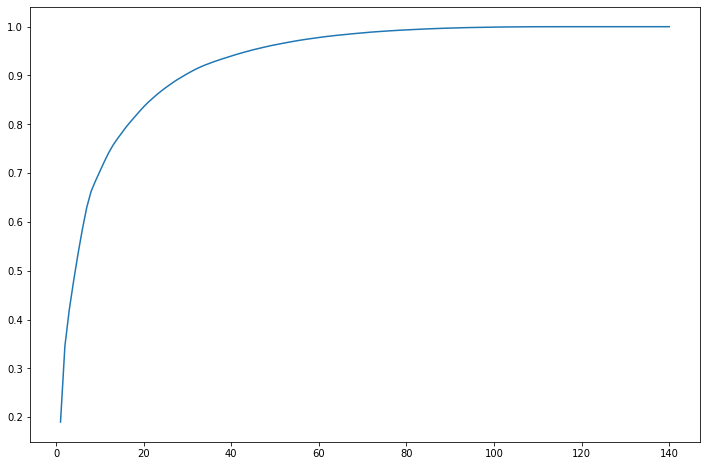

In [76]:
fig = plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)

## Looking at the scree plot with 50 PCs we have more than 95% of variance explained.

In [77]:
pca_final = IncrementalPCA(n_components=50)

In [78]:
df_train_pca = pca_final.fit_transform(X_resampled)

In [79]:
df_train_pca.shape

(27020, 50)

In [80]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [81]:
corrmat.shape

(50, 50)

In [82]:
corrmat

array([[ 1.00000000e+00, -2.92919637e-07,  2.09144858e-07, ...,
         1.80826532e-05,  2.82094580e-06,  3.42166894e-06],
       [-2.92919637e-07,  1.00000000e+00, -1.49875986e-07, ...,
         7.22217252e-05, -2.32589351e-05,  1.01608309e-05],
       [ 2.09144858e-07, -1.49875986e-07,  1.00000000e+00, ...,
        -2.89197403e-05,  2.08158247e-05,  6.39965825e-05],
       ...,
       [ 1.80826532e-05,  7.22217252e-05, -2.89197403e-05, ...,
         1.00000000e+00, -2.38006794e-02,  6.16292151e-02],
       [ 2.82094580e-06, -2.32589351e-05,  2.08158247e-05, ...,
        -2.38006794e-02,  1.00000000e+00, -2.04525420e-02],
       [ 3.42166894e-06,  1.01608309e-05,  6.39965825e-05, ...,
         6.16292151e-02, -2.04525420e-02,  1.00000000e+00]])

### Applying the transformation on the test set

In [83]:
X_test.shape

(6304, 70)

In [86]:
df_test_pca = pca_final.transform(X_test_ori)
df_test_pca.shape

(6304, 50)

## Applying logistic regression on the data on our Principal components

In [87]:
learner_pca = LogisticRegression()

In [88]:
model_pca = learner_pca.fit(df_train_pca, y_resampled)

### Making predictions on the test set

In [89]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [92]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.8'

##### So we could see the accuracy coming to 80%.
We got a rough idea with PCA and Logistic Regression.
We now move to Lasso and Ridge Regression for further analysis and actual conclusion on right predictors and coefficients.
Let's try other models to see how it performs.

### Ridge and Lasso Regression


#### Ridge Regression

In [98]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_train_ori, y_train_ori)   #### Question: It should be run on smote date ? if yes, should we perform test/train split on new smote data?

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.2}


In [100]:
#Fitting Ridge model for alpha = 9.0 and printing coefficients which have been penalised
alpha = .2

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train, y_train) 

Ridge(alpha=0.2)

In [101]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023257,0.003675,0.004093,0.001358,0.0001,{'alpha': 0.0001},-0.123371,-0.129412,-0.121247,-0.117858,...,-0.123464,0.003889,28,-0.122060,-0.120269,-0.122520,-0.123028,-0.121376,-0.121851,0.000959
1,0.019398,0.000930,0.003069,0.000258,0.0010,{'alpha': 0.001},-0.123325,-0.129368,-0.121199,-0.117824,...,-0.123421,0.003886,27,-0.122021,-0.120225,-0.122477,-0.122992,-0.121331,-0.121809,0.000962
2,0.019766,0.000383,0.003173,0.000140,0.0100,{'alpha': 0.01},-0.122929,-0.129009,-0.120797,-0.117541,...,-0.123058,0.003868,26,-0.121703,-0.119860,-0.122126,-0.122700,-0.120958,-0.121469,0.000985
3,0.020324,0.000590,0.003159,0.000198,0.0500,{'alpha': 0.05},-0.122084,-0.128271,-0.119976,-0.116946,...,-0.122310,0.003838,7,-0.121046,-0.119113,-0.121446,-0.122110,-0.120221,-0.120787,0.001037
4,0.020361,0.000446,0.003267,0.000090,0.1000,{'alpha': 0.1},-0.121740,-0.127995,-0.119735,-0.116757,...,-0.122053,0.003815,2,-0.120825,-0.118849,-0.121248,-0.121909,-0.119995,-0.120565,0.001059


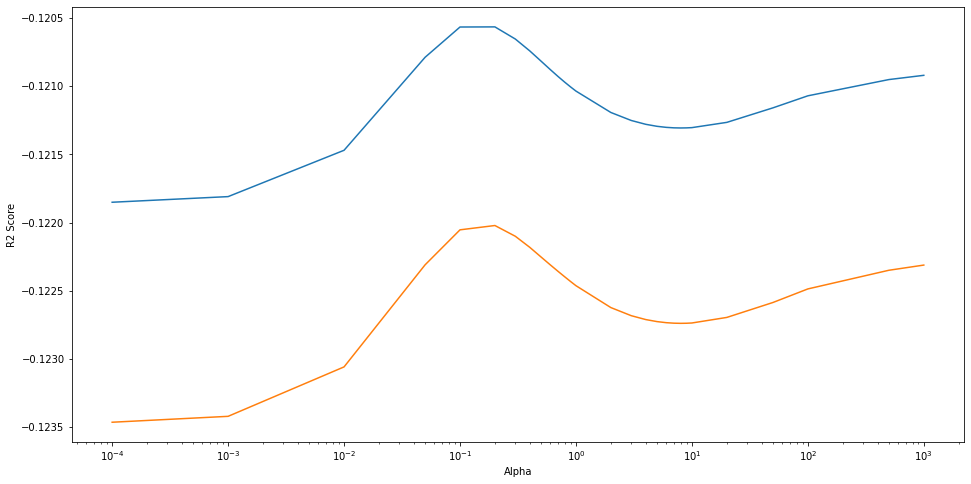

In [102]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()